\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

Below is the definition of the function ```data``` that, given the value of $\rho$, will draw a sample of size 100 from the bivariate normal distribution with desired mean and covariance matrix. 

In [95]:
from scipy.stats import multivariate_normal
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

mu = [1, 2]
sigma = lambda rho: [[1, rho], [rho, 1]]
dist = lambda rho: multivariate_normal(mean=mu, cov=sigma(rho))
data = lambda rho: DataFrame(dist(rho).rvs(10000), columns=['x', 'y'])
mean = DataFrame([mu], columns=['x', 'y'])

The size of the data is confirmed to be $100\times 2$.

In [96]:
data(rho=0.6).shape

(10000, 2)

Here is a comparison of the scatter plots with $\rho=0.6$ and $\rho=0.9$. 

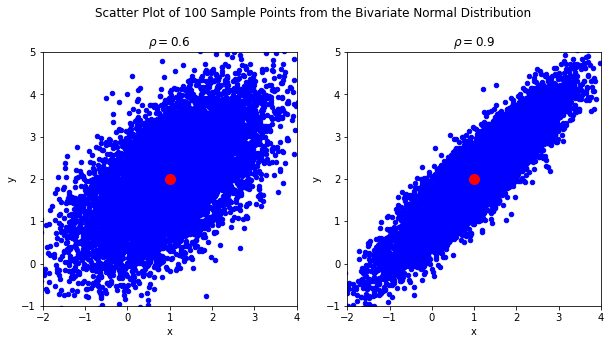

In [97]:
fig, (ax0, ax1) = plt.subplots(1, 2)

data(rho=0.6).plot(kind='scatter', x='x', y='y', color='blue', ax=ax0) 
data(rho=0.9).plot(kind='scatter', x='x', y='y', color='blue', ax=ax1)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax0)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax1)

ax0.set(aspect=1, title='$\\rho = 0.6$')
ax1.set(aspect=1, title='$\\rho = 0.9$');
fig.set_size_inches(10, 5)
fig.suptitle('Scatter Plot of 100 Sample Points from the Bivariate Normal Distribution');

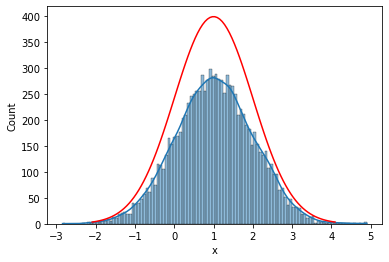

In [101]:
from scipy.stats import norm
import numpy as np

rho = 0.6
data1d = data(rho=rho)[['x']]
norm_dist = norm(loc=mu[0], scale=sigma(rho)[0][0])

xs = np.linspace(norm_dist.ppf(0.001), norm_dist.ppf(0.999), 100)
ax = sns.histplot(data=data1d, x='x', kde=True, bins=110)
Series({x: 1000*norm_dist.pdf(x) for x in xs}).plot(color='red', ax=ax);


In [93]:
data1d.max(), data1d.min(), (data1d.max() - data1d.min())/10


(x    3.20517
 dtype: float64,
 x   -1.833968
 dtype: float64,
 x    0.503914
 dtype: float64)

In [40]:
from scipy.stats import norm
norm.ppf(0.01)

-2.3263478740408408

<AxesSubplot:xlabel='x', ylabel='Count'>

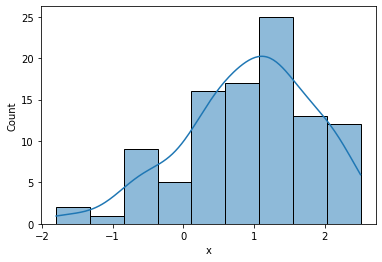

In [37]:
import seaborn as sns
from scipy.stats import norm

ax = sns.histplot(data=data(rho=0.6), x='x', kde=True)
norm_pdf = DataFrame({'x': np.arange(0., 5., 0.2)})



fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x))

Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. This returns a “frozen” RV object holding the given parameters fixed.

Freeze the distribution and display the frozen pdf:
>>>

rv = norm()

ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

Check accuracy of cdf and ppf:
>>>

vals = norm.ppf([0.001, 0.5, 0.999])

np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
True

Generate random numbers:
>>>

r = norm.rvs(size=1000)

And compare the histogram:
>>>

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

# 1. {-}

## (a) {-}

As the below realization of the error suggests, considering the mean squared prediction error, mean is a better estimator than median. 

In [1]:
from scipy.stats import expon
from numpy import abs
import numpy as np

mean = 1
median = np.log(2)
n = 1000

rvs = expon.rvs(size=n)

print(((rvs - mean)**2).mean())    # mean squared error of the mean
print(((rvs - median)**2).mean())  # mean squared error of the median

1.075383043650204
1.1883149611307744


## (b) {-}

In contrast, considering the mean absolute prediction error, median is a (slightly) better estimator than mean. 

In [2]:
rvs = expon.rvs(size=n)

print((abs(rvs - mean)).mean())    # mean absolute error of the mean 
print((abs(rvs - median)).mean())  # mean absolute error of the median

0.7655840643978613
0.7291958553195591


# 2. {-}

## (a) {-}

Below is a plot of the loss function 
\begin{align*}
\mathcal L(Y, f(X)) &= b\left(e^{a(Y-f(X))} - a(Y-f(X)) - 1\right) \\
&= b\left(e^{az} - az - 1\right). 
\end{align*}

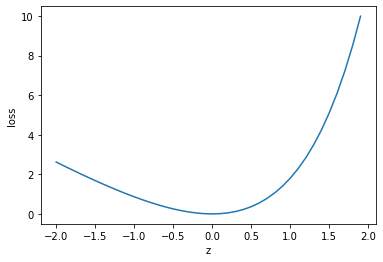

In [3]:
from numpy import exp
from pandas import DataFrame

a = 1.1
b = 2

loss = lambda z: b*(exp(a*z) - a*z -1)
    
ax = DataFrame([(x, loss(x)) for x in np.arange(-2, 2, 0.1)], columns=['z', 'loss']).set_index('z').plot(legend=None)
ax.set_ylabel('loss')
ax.set_xlabel('z');

This is known as the LINEX loss function. Roughly speaking, on the right (when $z>0$) the loss goes up exponentially with the absolute prediction error, while on the left ($z<0$) it only goes up linearly with the absolute prediction error. 

Note that $z = Y - f(X) > 0$ means $f(X)$ underestimates $Y$ while $z<0$ means $f(X)$ overestimates $Y$. We might choose to use this loss function when the consequences of underestimating are much more serious than overestimating. An example could be to estimate a bank's value at risk, where underestimating could result in insufficient reserve and a default event, while the only consequence of overestimating is slight inefficiency in funding and is minor. Another example is to predict the stock price at some point in time in the future and write a naked call option based on that prediction, in which case a serious underestimating of the stock price means the option expires deep in the money and the writer takes a huge loss, while overestimating simply means the writer could have collected more premium by writing an option with a lower strike. 

## (b) {-}

The expected loss is
\begin{align}
\mathbb E\mathcal L(Y, f(X)) &= \mathbb E[\mathbb E[ b(e^{a(Y-f(X))} - a(Y-f(X)) -1) |X]]\\
&= \mathbb E[b \mathbb E[e^{a(Y-f(X))}|X] - abE[Y-f(X)|X] -b]\\
&= \mathbb E[b e^{-af(X)}\mathbb E[e^{aY}|X] - abE[Y|X] + abf(X) -b], 
\end{align}
which is minimized when the integrand $b e^{-af(x)}\mathbb E[e^{aY}|X=x] - abE[Y|X=x] + abf(x) -b$ is minimized for a given $x$. 
Differentiate with respect to $f(x)$ and set to zero to get $-ab e^{f(x)}\mathbb E[e^{aY}|X=x] + ab = 0$, or equivalently 
\begin{align}
f(x) = \frac{1}{a}\log\mathbb E[e^{aY}|X=x]. 
\end{align}
Since $a, b > 0$, the second derivative of the integrand is $-ab e^{f(x)}\mathbb E[e^{aY}|X=x] < 0$. Thus we conclude that $f(x) = (\log\mathbb E[e^{aY}|X=x])/a$ minimizes the expected loss. 

## (c) {-}

Since $(Y|X=x) \sim N(\beta x, \sigma^2)$, we have $\mathbb E[e^{aY}|X=x] = e^{a\beta x + \frac12 a^2\sigma^2}$. Thus the optimal estimator $f(x)$ is 
\begin{align}
f(x) = \frac{1}{a}\log\mathbb E[e^{aY}|X=x] = \beta x + \frac{a}{2} \sigma^2.
\end{align}

## (d) {-}

Following the above result, the ```f_yours``` function is implemented to return ```beta*x + 0.5*a*sigma**2```. The simulation results are as below. 

In [4]:
!python asymm_loss.py

Average loss of the conditional expectation: 16.36
Average loss of your method: 4.49


The average loss computed using the optimal estimator $f(X) = \beta X + a\sigma^2/2$ is indeed much smaller than the average loss computed using the conditional expectation $\beta X$. Intuitively this makes sense because this version of the LINEX loss function we are looking at penalizes more when underestimating and the optimal estimator is larger than the conditional expectation by $a\sigma^2/2$. Because of this (positive) adjustment, the optimal estimator are less likely to underestimate. Without this adjustment, the conditional expectation is expected to underestimate more often than the optimal estimator and as a result makes the average loss larger. 

# 3. {-}

As the results shown below, the more useless additional variables there are, the larger the average mean squared prediction error is. Below 100 simulations are performed for each $p$. 

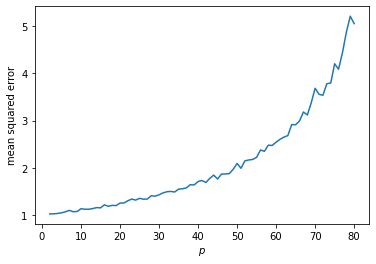

In [3]:
from scipy.stats import norm
from pandas import Series, DataFrame
import statsmodels.api as sm
import numpy as np

n_sim = 100

n = 100
m = 100
p = 2

def mse(p):
    trainX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=n) for i in range(p)})
    trainY = 4*trainX['X01'] + norm.rvs(size=n)

    testX = DataFrame({'X%02d'%(i+1) : norm.rvs(size=m) for i in range(p)})
    testY = 4*testX['X01'] + norm.rvs(size=m)

    model = sm.OLS(exog=trainX, endog=trainY).fit()
    return ((testY - (testX @ model.params))**2).mean()
        
def avg_mse(p):
    return np.mean([mse(p) for _ in range(n_sim)])    

ax = Series({p: avg_mse(p) for p in range(2, 81)}).plot()
ax.set_ylabel('mean squared error')
ax.set_xlabel('$p$');